# n-Local Chain Network Optimization

This notebook uses gradient descent to reproduce the nonlocality results for the $n$-local chain network as described in ["Correlations in n-local scenario"](https://arxiv.org/abs/1411.4188).

<div>
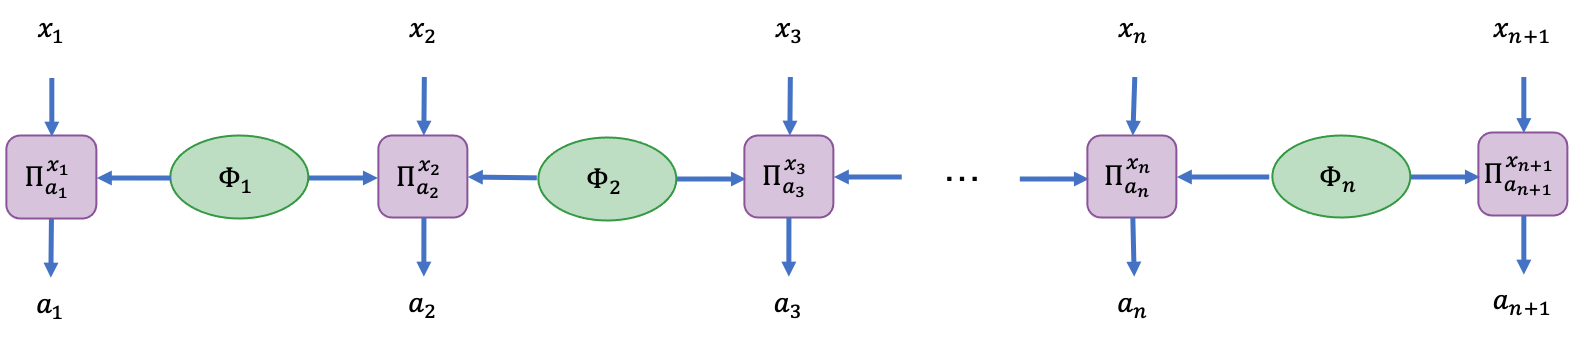
</div>
    
<!-- [<img src="images/n-local_chain_network.png" width="800"/>](images/n-local_chain_network.png) -->

See the docs and source code for more details on the $n$-local chain Bell inquality.


## Setup

In [1]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt
import time

from context import QNetOptimizer as QNopt

In [47]:
def bell_state_local_RY(settings, wires):
    qml.Hadamard(wires=wires[0])
    qml.CNOT(wires=wires[0:2])
    qml.RY(settings[0], wires=wires[0])
    qml.RY(settings[1], wires=wires[1])
    
def nlocal_prepare_nodes(n, ansatz_fn, num_settings):
    return [QNopt.PrepareNode(1, [2*i, 2*i + 1], ansatz_fn, num_settings) for i in range(n)]
    
def nlocal_chain_RY_measure_nodes(n):
    meas_nodes = [QNopt.MeasureNode(2, 2, [0], QNopt.local_RY, 1)]
    meas_nodes.extend([
        QNopt.MeasureNode(2, 2, [2*i + 1, 2*i + 2], QNopt.local_RY, 2) for i in range(0,n-1)
    ])
    meas_nodes.append(QNopt.MeasureNode(2, 2, [2*n-1], QNopt.local_RY, 1))
    
    return meas_nodes

def nlocal_chain_arbitrary_measure_nodes(n):
    meas_nodes = [QNopt.MeasureNode(2, 2, [0], qml.templates.subroutines.ArbitraryUnitary, 3)]
    meas_nodes.extend([
        QNopt.MeasureNode(2, 2, [2*i + 1, 2*i + 2], qml.templates.subroutines.ArbitraryUnitary, 15) for i in range(0,n-1)
    ])
    meas_nodes.append(QNopt.MeasureNode(2, 2, [2*n-1], qml.templates.subroutines.ArbitraryUnitary, 3))
    
    return meas_nodes

## $n$-Local Chain with Static Bell State Preparations and Local Qubit Measurements

In [38]:
%%time

static_bell_state_opt_dicts = []

for n in range(2,10):
    print("n = ", n)
    
    n_prep_nodes = nlocal_prepare_nodes(n, QNopt.ghz_state, 0)
    n_meas_nodes = nlocal_chain_RY_measure_nodes(n)

    n_ansatz = QNopt.NetworkAnsatz(n_prep_nodes, n_meas_nodes)
    n_cost = QNopt.nlocal_chain_cost_22(n_ansatz)
    
    np.random.seed(1)
    n_settings = n_ansatz.rand_scenario_settings()

    n_opt_dict = QNopt.gradient_descent(
            n_cost, n_settings, sample_width = 2, num_steps = 10, step_size=2
    )

    print("opt_score : ", n_opt_dict["opt_score"])
    
    static_bell_state_opt_dicts.append(n_opt_dict)


n =  2
iteration :  0 , score :  1.0749555827308797
iteration :  2 , score :  1.4053193888009416
iteration :  4 , score :  1.4139705446611015
iteration :  6 , score :  1.4142065671578448
iteration :  8 , score :  1.4142133576433318
opt_score :  1.4142135563551972
n =  3
iteration :  0 , score :  0.3557260490520625
iteration :  2 , score :  1.3831399179526926
iteration :  4 , score :  1.4136807570089824
iteration :  6 , score :  1.4142011539064532
iteration :  8 , score :  1.4142132211661465
opt_score :  1.4142135525062003
n =  4
iteration :  0 , score :  0.38406020359909887
iteration :  2 , score :  1.392073702012521
iteration :  4 , score :  1.4138227109178672
iteration :  6 , score :  1.4142039912918554
iteration :  8 , score :  1.4142132946463768
opt_score :  1.4142135545951444
n =  5
iteration :  0 , score :  0.5202125430805763
iteration :  2 , score :  1.292691847990332
iteration :  4 , score :  1.410240582935079
iteration :  6 , score :  1.4141245964036897
iteration :  8 , score 

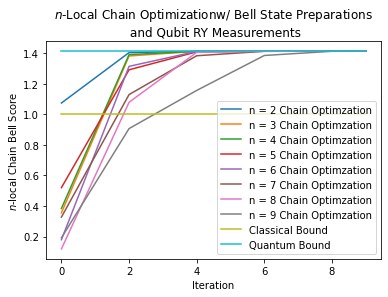

In [66]:
num_samples = len(static_bell_state_opt_dicts[0]["samples"])

id = 0
ns = range(2,10)
for opt_dict in static_bell_state_opt_dicts:
    plt.plot(opt_dict["samples"], opt_dict["scores"], label = f"n = {ns[id]} Chain Optimzation")
    id += 1

plt.plot(static_bell_state_opt_dicts[0]["samples"], [1]*num_samples, label = "Classical Bound")
plt.plot(static_bell_state_opt_dicts[0]["samples"], [2/np.sqrt(2)]*num_samples, label = "Quantum Bound")
plt.title(r"$n$-Local Chain Optimization" + "w/ Bell State Preparations \n and Qubit RY Measurements")
plt.xlabel("Iteration")
plt.ylabel(r"$n$-local Chain Bell Score")
plt.legend()
plt.show()

## $n$-Local Chain Optimization with Bell State Preparations and Arbitrary Measurements

In [57]:
%%time

static_bell_state_arb_meas_opt_dicts = []

for n in range(2,6):
    print("n = ", n)
    
    n_prep_nodes = nlocal_prepare_nodes(n, QNopt.ghz_state, 0)
    n_meas_nodes = nlocal_chain_arbitrary_measure_nodes(n)

    n_ansatz = QNopt.NetworkAnsatz(n_prep_nodes, n_meas_nodes)
    n_cost = QNopt.nlocal_chain_cost_22(n_ansatz)
    
    np.random.seed(1)
    n_settings = n_ansatz.rand_scenario_settings()

    n_opt_dict = QNopt.gradient_descent(
            n_cost, n_settings, sample_width = 2, num_steps = 25, step_size=1
    )

    print("opt_score : ", n_opt_dict["opt_score"])
    
    static_bell_state_arb_meas_opt_dicts.append(n_opt_dict)

n =  2
iteration :  0 , score :  0.3935229793110803
iteration :  2 , score :  1.114340409344389
iteration :  4 , score :  1.2730074152118158
iteration :  6 , score :  1.3300963241135295
iteration :  8 , score :  1.3622261158098237
iteration :  10 , score :  1.3810683157337142
iteration :  12 , score :  1.3920850620152394
iteration :  14 , score :  1.3986589695334604
iteration :  16 , score :  1.4027357965927076
iteration :  18 , score :  1.4053820296824635
iteration :  20 , score :  1.4071807890862893
iteration :  22 , score :  1.4084573978851354
iteration :  24 , score :  1.4093987327436364
opt_score :  1.409780295004552
n =  3
iteration :  0 , score :  0.12295860270291417
iteration :  2 , score :  1.1173496803870568
iteration :  4 , score :  1.3107156618478635
iteration :  6 , score :  1.3645704249433623
iteration :  8 , score :  1.389816865164066
iteration :  10 , score :  1.40138824382389
iteration :  12 , score :  1.4067834769335847
iteration :  14 , score :  1.4095112833982264
it

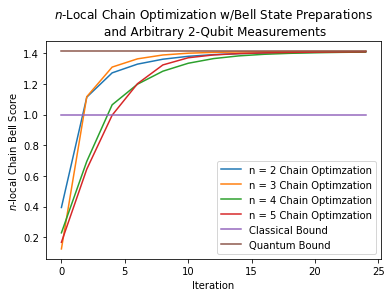

In [65]:
num_samples = len(static_bell_state_arb_meas_opt_dicts[0]["samples"])

id = 0
ns = range(2,6)
for opt_dict in static_bell_state_arb_meas_opt_dicts:
    plt.plot(opt_dict["samples"], opt_dict["scores"], label = f"n = {ns[id]} Chain Optimzation")
    id += 1

plt.plot(static_bell_state_arb_meas_opt_dicts[0]["samples"], [1]*num_samples, label = "Classical Bound")
plt.plot(static_bell_state_arb_meas_opt_dicts[0]["samples"], [2/np.sqrt(2)]*num_samples, label = "Quantum Bound")
plt.title(r"$n$-Local Chain Optimization w/"+  "Bell State Preparations \n and Arbitrary 2-Qubit Measurements")
plt.xlabel("Iteration")
plt.ylabel(r"$n$-local Chain Bell Score")
plt.legend()
plt.show()

## Global GHZ State Preparation and Arbitrary $n$-Local Chain Measurements 

Remarkably, even when a GHZ state is shared across all nodes, we still cannot exceed the quantum bound. 

In [72]:
%%time

static_ghz_state_arb_meas_opt_dicts = []

for n in range(2,6):
    print("n = ", n)
    
    n_prep_nodes = [QNopt.PrepareNode(1,range(0,2*n), QNopt.ghz_state, 0)]
    n_meas_nodes = nlocal_chain_arbitrary_measure_nodes(n)

    n_ansatz = QNopt.NetworkAnsatz(n_prep_nodes, n_meas_nodes)
    n_cost = QNopt.nlocal_chain_cost_22(n_ansatz)
    
    n_settings = n_ansatz.rand_scenario_settings()

    n_opt_dict = QNopt.gradient_descent(
            n_cost, n_settings, sample_width = 5, num_steps = 40, step_size=0.5
    )

    print("opt_score : ", n_opt_dict["opt_score"])
    
    static_ghz_state_arb_meas_opt_dicts.append(n_opt_dict)

n =  2
iteration :  0 , score :  0.3291457428921599
iteration :  5 , score :  1.144852291668756
iteration :  10 , score :  1.312797823889695
iteration :  15 , score :  1.3696828680663051
iteration :  20 , score :  1.3919436976958508
iteration :  25 , score :  1.4014712580918665
iteration :  30 , score :  1.4061246070230524
iteration :  35 , score :  1.4087310902545895
opt_score :  1.4103359295669806
n =  3
iteration :  0 , score :  0.1726292540297121
iteration :  5 , score :  1.1589398088712253
iteration :  10 , score :  1.3321139244756268
iteration :  15 , score :  1.3832675887327572
iteration :  20 , score :  1.4006237446081722
iteration :  25 , score :  1.4074370787492048
iteration :  30 , score :  1.4104721458968474
iteration :  35 , score :  1.4119715626492204
opt_score :  1.4127771258272306
n =  4
iteration :  0 , score :  0.27950002041125044
iteration :  5 , score :  0.9613214434737867
iteration :  10 , score :  1.2725803960459743
iteration :  15 , score :  1.3645452604168935
it

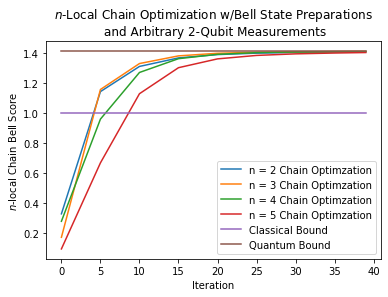

In [73]:
num_samples = len(static_ghz_state_arb_meas_opt_dicts[0]["samples"])

id = 0
ns = range(2,6)
for opt_dict in static_ghz_state_arb_meas_opt_dicts:
    plt.plot(opt_dict["samples"], opt_dict["scores"], label = f"n = {ns[id]} Chain Optimzation")
    id += 1

plt.plot(static_ghz_state_arb_meas_opt_dicts[0]["samples"], [1]*num_samples, label = "Classical Bound")
plt.plot(static_ghz_state_arb_meas_opt_dicts[0]["samples"], [2/np.sqrt(2)]*num_samples, label = "Quantum Bound")
plt.title(r"$n$-Local Chain Optimization w/"+  "Bell State Preparations \n and Arbitrary 2-Qubit Measurements")
plt.xlabel("Iteration")
plt.ylabel(r"$n$-local Chain Bell Score")
plt.legend()
plt.show()